In [1]:
#import libraries 
import numpy as np 
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score , precision_score,recall_score,f1_score


In [2]:
# load 
data = pd.read_csv('framingham.csv',sep =',')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
print(f"the data has {data.shape[0]} rows and {data.shape[1]}columns")

the data has 4240 rows and 16columns


In [4]:
m_v = data.isnull().sum()
print('missing values\n',m_v)
total_per = (m_v.sum()/data.shape[0])*100
print(f"total percentage of missing values {round(total_per,2)}%")


missing values
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
total percentage of missing values 15.21%


In [5]:
#drop missing values 
data.dropna(axis=1,inplace=True)

In [6]:
data.shape

(4240, 9)

In [7]:
data.sample()

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD
3286,0,56,0,0,1,0,164.5,102.0,0


In [8]:
data.describe()

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,0.005896,0.310613,0.025708,132.354599,82.897759,0.151887
std,0.495027,8.572942,0.500024,0.076569,0.462799,0.158280,22.033300,11.910394,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,83.500000,48.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,117.000000,75.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,128.000000,82.000000,0.000000
75%,1.000000,56.000000,1.000000,0.000000,1.000000,0.000000,144.000000,90.000000,0.000000
max,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,295.000000,142.500000,1.000000


In [9]:
data.dtypes

male                 int64
age                  int64
currentSmoker        int64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
sysBP              float64
diaBP              float64
TenYearCHD           int64
dtype: object

In [10]:
data.columns.to_list()

['male',
 'age',
 'currentSmoker',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'sysBP',
 'diaBP',
 'TenYearCHD']

<Axes: xlabel='TenYearCHD'>

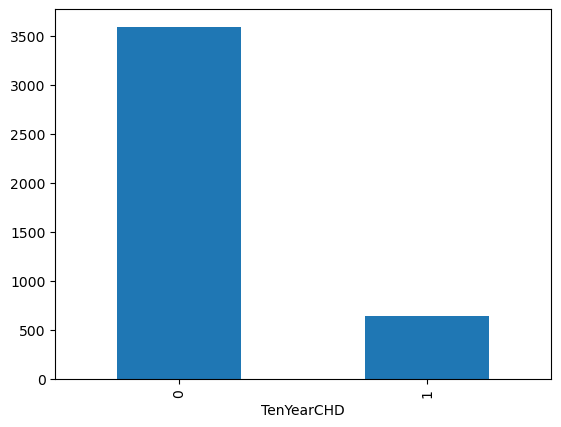

In [11]:
#TenYearCHD: binary variable indicating if a CH disease will be developed in ten years (1)or not(0)
data.TenYearCHD.value_counts().plot.bar()

In [12]:
def plt_boxplots(df):
    fig, axes = plt.subplots(1,len(df.columns), figsize=(20,5))
    for i ,column_name in enumerate(df.columns):
        df.boxplot(column=column_name, ax=axes[i])
        axes[i].set_title(column_name)
        
    plt.show()

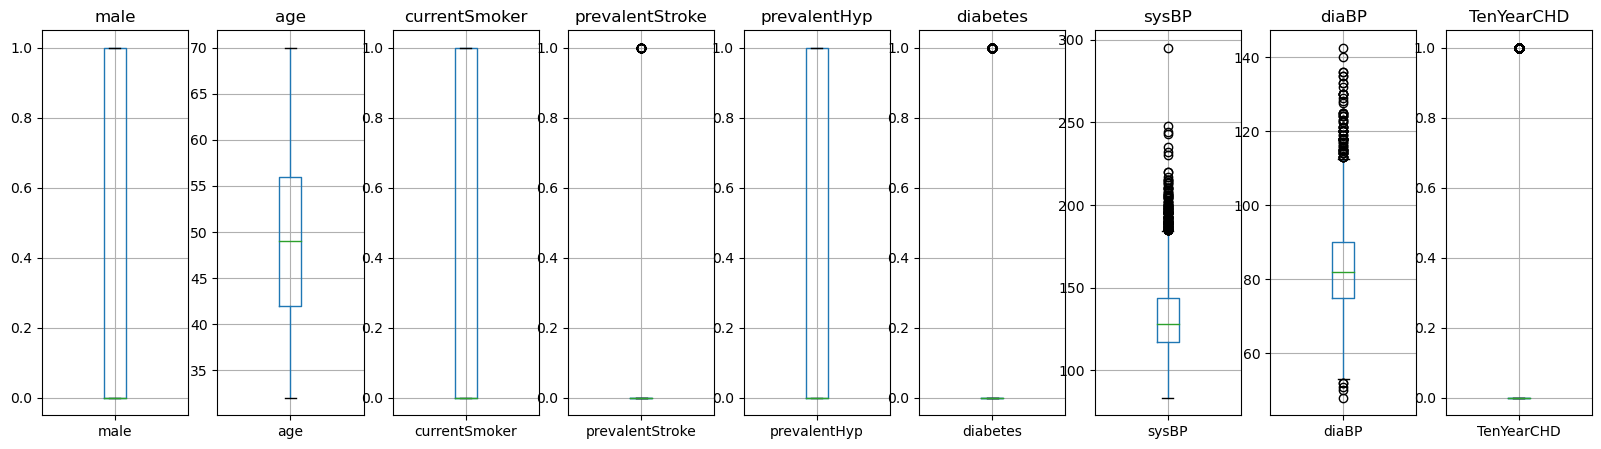

In [13]:
plt_boxplots(data)

In [14]:
def remove_outliers(df):
    df_no_outliers = df.copy()
    
    for column_name in df.columns:
        Q1=df[column_name].quantile(0.25)
        Q3=df[column_name].quantile(0.75)
        
        IQR = Q3-Q1
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR
    
        df_no_outliers[column_name]=df_no_outliers[column_name].apply(lambda x: lower_bound if x< lower_bound else upper_bound if x>upper_bound else x)
    
    return df_no_outliers
    
    

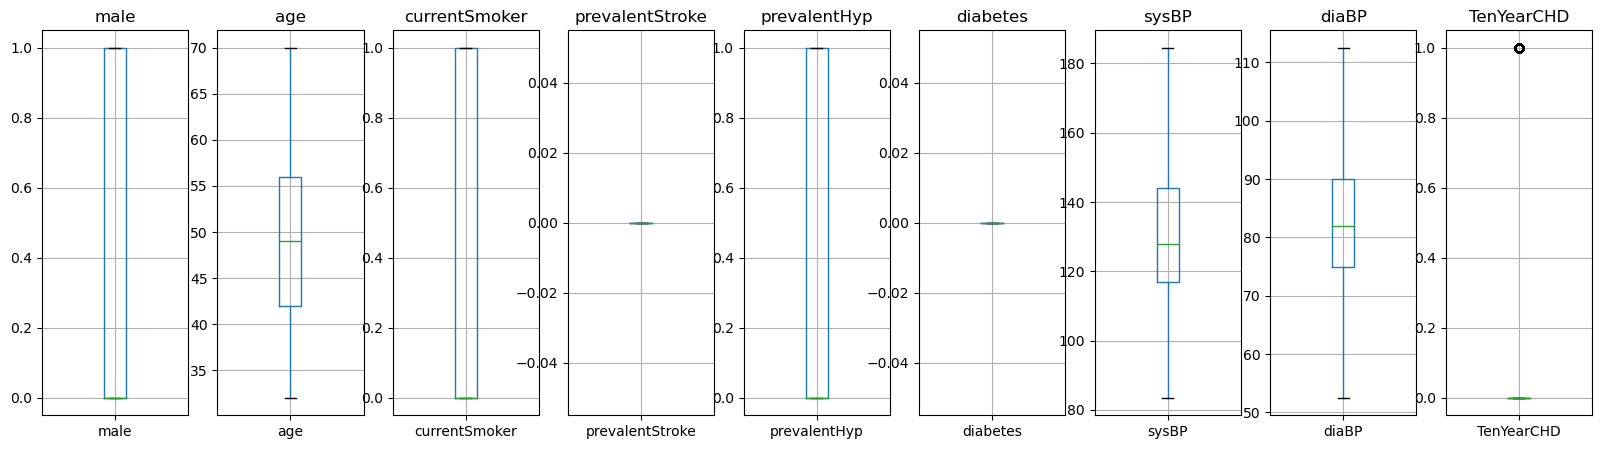

In [15]:
data_new=data.copy()
data_new=data_new.drop(columns=['TenYearCHD'])
data_new =remove_outliers(data_new)
data_new['TenYearCHD']=data['TenYearCHD']
plt_boxplots(data_new)

<Axes: >

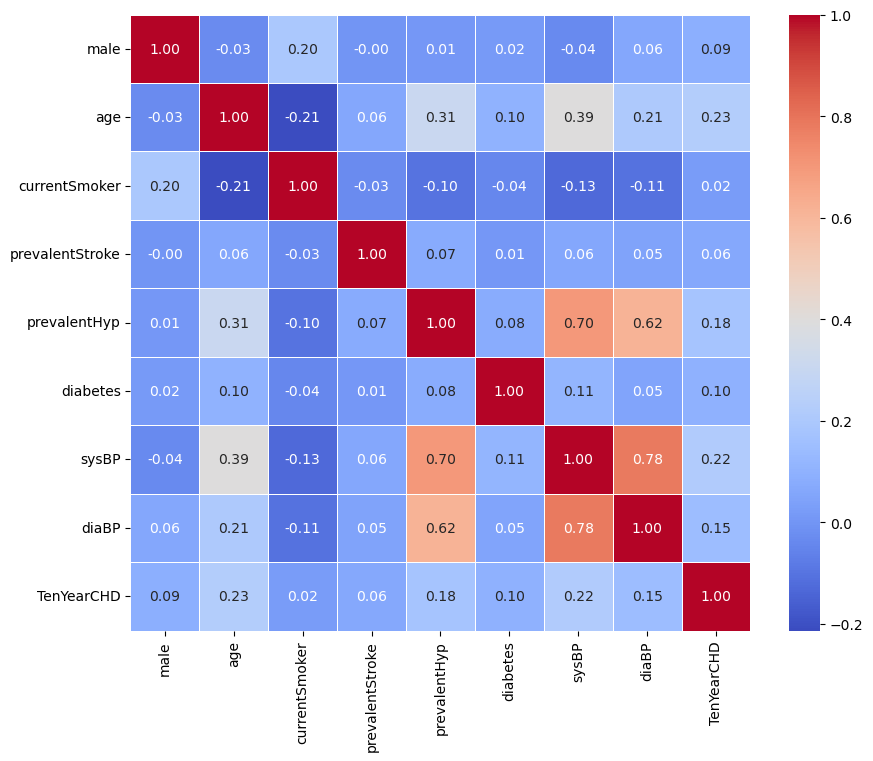

In [16]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f",linewidth=0.5)

In [17]:
#spliting data
X= data_new.drop('TenYearCHD', axis=1)
y=data_new['TenYearCHD']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
#model training 
model= LR(random_state=42)
model.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

In [20]:
#model evaluation 
y_pred =model.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall= recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print(f'Accuracy:{accuracy:.2f}')
print(f'Precision:{precision:.2f}')
print(f'Recall:{recall:.2f}')
print(f'F1 score:{f1:.2f}')

Accuracy:0.84
Precision:0.29
Recall:0.03
F1 score:0.06


In [21]:
#cross validation 
from sklearn.model_selection import cross_val_score 

cv_scores=cross_val_score(model,X,y,cv=5)
print (f'Cross_validation scores (Accuracy):{cv_scores}')
print (f'Mean CV score (Accuracy):{cv_scores.mean():.2f}')
print (f'Standard Deviation of CV score (Accuracy):{cv_scores.std():.2f}')


Cross_validation scores (Accuracy):[0.85023585 0.8490566  0.84669811 0.8490566  0.84551887]
Mean CV score (Accuracy):0.85
Standard Deviation of CV score (Accuracy):0.00


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite